In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [2]:
#load dataset

file_name = "Crop_recommendation.csv"
df = pd.read_csv(file_name)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
#encode labels to int, and parse to json
import json

labelEncoder = LabelEncoder()

labelEncoder.fit(df["label"])
labelEncoder_key_value = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))

keys_values = labelEncoder_key_value.items()
output_key_val = {str(key): str(value) for key, value in keys_values}

with open('labelEncoder_dict.json', 'w') as output_file:
    json.dump(output_key_val, output_file, indent=4)

# pd.DataFrame(labelEncoder_key_value.items(), columns=['Original Label', 'Encoded'])

In [ ]:
#apply to dataset

df["label"] = labelEncoder.transform(df["label"])

df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [ ]:
#scaling to reduce range

minmaxScaler = MinMaxScaler()
minmaxScaler.fit(df.iloc[:, 0:-1])
df.iloc[:, 0:-1] = minmaxScaler.transform(df.iloc[:, 0:-1])

In [ ]:
#df before modelling

df

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,20
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,20
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,20
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,20
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,20
...,...,...,...,...,...,...,...,...
2195,0.764286,0.207143,0.135,0.515037,0.608410,0.509353,0.566064,5
2196,0.707143,0.071429,0.110,0.533473,0.494359,0.401561,0.386972,5
2197,0.842857,0.200000,0.125,0.439202,0.617880,0.444433,0.550071,5
2198,0.835714,0.192857,0.145,0.500627,0.441760,0.506045,0.384280,5


In [ ]:
#feature x label selection

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [ ]:
#one-hot encoding for label

y = tf.keras.utils.to_categorical(y)

In [ ]:
#train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
#modelling process

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(22, activation='softmax')
])

class Reminder(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        ACCURACY_THRESHOLD = 0.99
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD and logs.get('accuracy') > ACCURACY_THRESHOLD):   
            print("\nTarget reached %2.2f%%. Stop Training" %(ACCURACY_THRESHOLD*100))
            # self.model.stop_training = True

reminderCB = Reminder()

checkpoint_filepath = 'model/weights.{epoch:02d}-{val_loss:.3f}.h5'
checkpointCB = tf.keras.callbacks.ModelCheckpoint(
                    filepath=checkpoint_filepath,
                    monitor='val_accuracy',
                    mode='max',
                    save_best_only=True)

model.compile(loss='categorical_crossentropy',optimizer='rmsprop' ,metrics=['accuracy'])

fitting_history = model.fit(
                        X_train,
                        y_train,
                        epochs=200,
                        steps_per_epoch = 50,
                        validation_data=(X_test, y_test),
                        callbacks = [reminderCB,checkpointCB],
                    )

Epoch 1/200
50/50 [==============================] - 1s 6ms/step - loss: 2.6431 - accuracy: 0.2798 - val_loss: 2.1610 - val_accuracy: 0.4545
Epoch 2/200
50/50 [==============================] - 0s 1ms/step - loss: 1.6797 - accuracy: 0.5591 - val_loss: 1.4114 - val_accuracy: 0.5545
Epoch 3/200
50/50 [==============================] - 0s 1ms/step - loss: 1.1123 - accuracy: 0.7136 - val_loss: 1.0093 - val_accuracy: 0.7227
Epoch 4/200
50/50 [==============================] - 0s 1ms/step - loss: 0.8011 - accuracy: 0.7960 - val_loss: 0.8450 - val_accuracy: 0.6909
Epoch 5/200
50/50 [==============================] - 0s 1ms/step - loss: 0.6040 - accuracy: 0.8500 - val_loss: 0.6386 - val_accuracy: 0.7500
Epoch 6/200
50/50 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.8742 - val_loss: 0.5304 - val_accuracy: 0.8227
Epoch 7/200
50/50 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8975 - val_loss: 0.4508 - val_accuracy: 0.8545
Epoch 8/200
5

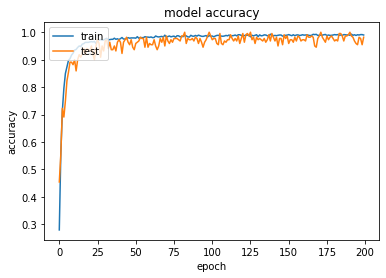

In [ ]:
plt.plot(fitting_history.history['accuracy'])
plt.plot(fitting_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

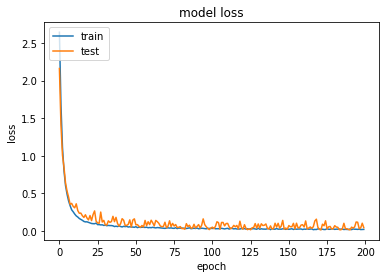

In [ ]:
plt.plot(fitting_history.history['loss'])
plt.plot(fitting_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()